In [3]:
from nilearn import plotting as niplt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mplcolors
import joblib
import itertools
import glob
import nibabel as nib
import matplotlib as ml
from random import shuffle
import mpld3
%load_ext autoreload
%autoreload 1
%aimport base.plotting

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [4]:
%aimport base.img_tools

In [5]:
from base.classifiers import OnevsallClassifier
from neurosynth.base.dataset import Dataset
dataset = Dataset.load("../data/0.6/datasets/db_v6_topics-60.pkl")

In [6]:
sns.set_context('talk')

In [9]:
sns.set_style('ticks')

## Hierarchical clustering solution

In [7]:
import fastcluster
from scipy.cluster.hierarchy import fcluster, dendrogram, cophenet
from neurosynth.analysis.cluster import Clusterable

In [8]:
masker = Clusterable(dataset, '../masks/neurosynth/fpn_fw_c30.nii.gz', min_studies=100).masker

whole_brain_masker = Clusterable(dataset, '../masks/HO_ROIs/cortex_30.nii.gz', min_studies=100).masker

Z = joblib.load('../results/clustering/hierarchical/v6_ward_FPN_c30.pkl')

whole_brain_Z = joblib.load('../results/clustering/hierarchical/v6_ward_c30.pkl')

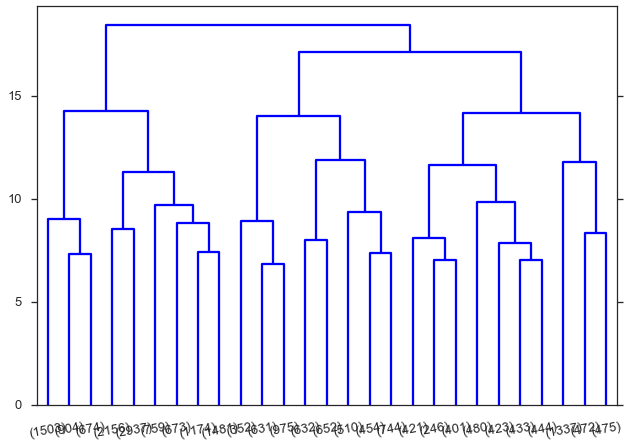

In [12]:
d = dendrogram(Z, 27, truncate_mode='lastp', color_threshold=0)
plt.savefig('../reports/dissertation/hierarchical_FPN.pdf')

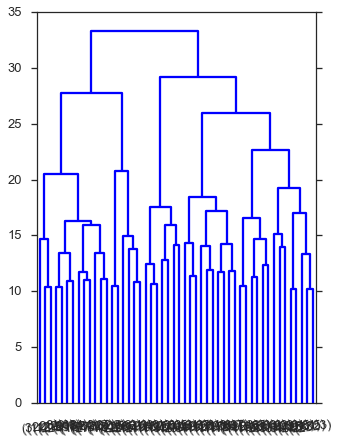

In [13]:
plt.figure(figsize=(5, 7))
d = dendrogram(whole_brain_Z, 50, truncate_mode='lastp', color_threshold=0)

In [124]:
distances  = joblib.load('../results/clustering/hierarchical/v6_fpn_distances.pkl')

In [128]:
from scipy.spatial.distance import pdist

In [130]:
d = pdist(distances)

In [132]:
cophenet(Z, d)

(0.46254084955022284,
 array([ 0.06754656,  0.35923753,  0.12845304, ...,  0.17952194,
         0.17952194,  0.1249839 ]))

In [14]:
whole_brain_colors = sns.color_palette("Blues")[2:5]+ [sns.color_palette('bright', 8)[4]] + sns.color_palette("Blues")[5:6]

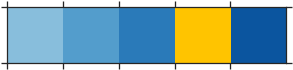

In [15]:
sns.palplot(whole_brain_colors)

In [16]:
grey = (0.4, 0.4, 0.4)

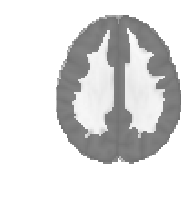

In [17]:
img = nib.load('../masks/HO_ROIs/cortex_30.nii.gz')
niplt.plot_roi(img,  cmap = mplcolors.ListedColormap(grey), draw_cross=False,
              display_mode='z', cut_coords=[32], annotate=False, alpha=0.8)

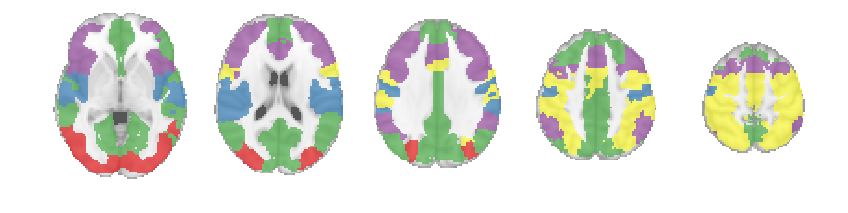

In [22]:
img = nib.Nifti1Image(whole_brain_masker.unmask(fcluster(whole_brain_Z, 5, 'maxclust')), masker.get_header().get_best_affine())
colors = sns.color_palette('Set1', 6)
shuffle(colors)
niplt.plot_roi(img,  cmap = mplcolors.ListedColormap(colors), draw_cross=False,
                  display_mode='z', cut_coords=[-2, 18, 32, 46, 58], annotate=False)

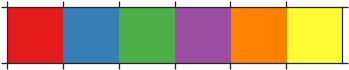

In [23]:
sns.palplot(sns.color_palette('Set1', 6))

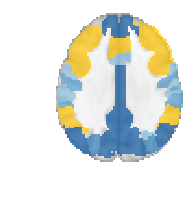

In [24]:
img = nib.Nifti1Image(whole_brain_masker.unmask(fcluster(whole_brain_Z, 5, 'maxclust')), masker.get_header().get_best_affine())
niplt.plot_roi(img,  cmap = mplcolors.ListedColormap(whole_brain_colors), draw_cross=False,
              display_mode='z', cut_coords=[32], annotate=False)

In [25]:
from random import shuffle

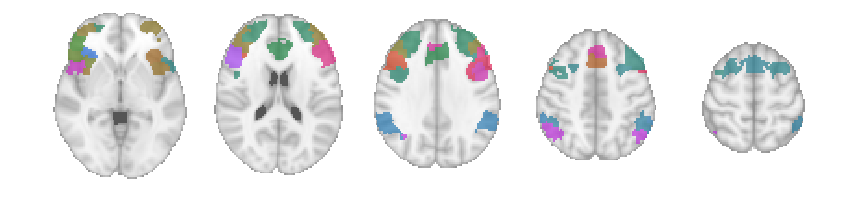

In [26]:
for n_clusters in [27]:
    img = nib.Nifti1Image(masker.unmask(fcluster(Z, n_clusters, 'maxclust')), masker.get_header().get_best_affine())
    if n_clusters > 9:
        colors = sns.husl_palette(n_clusters, s=.9, l=.5)
        shuffle(colors)
    else:
        colors = sns.color_palette('Set1', n_clusters)
    niplt.plot_roi(img,  cmap = mplcolors.ListedColormap(colors), draw_cross=False,
                  display_mode='z', cut_coords=[-2, 18, 32, 46, 58], annotate=False)
#     plt.savefig('../reports/dissertation/Figures/Clusters_%d.pdf' % n_clusters)
    nib.save(img, '../results/clustering/hierarchical/fastward_fpn_v6/flat_k%d' % n_clusters)

## Silhouette scores

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
distances = joblib.load('../results/clustering/hierarchical/v6_fpn_distances.pkl')

In [29]:
for n_clusters in range(34, 40):
    silhouettes.append([silhouette_score(distances, fcluster(Z, n_clusters, 'maxclust')), n_clusters])

NameError: name 'silhouettes' is not defined

In [ ]:
silhouettes = pd.concat([silhouettes[['silhouette', 'n_clusters']], silhouettes1])

In [ ]:
silhouettes.to_csv('../results/clustering/hierarchical/v6_ward_fpn_sil.csv')

In [218]:
silhouettes = pd.read_csv('../results/clustering/hierarchical/v6_ward_fpn_sil.csv')

In [219]:
sns.set_style('ticks')

In [220]:
# silhouettes = silhouettes[silhouettes.n_clusters < 31]

In [262]:
silhouettes['Local maxima']

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13     True
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25     True
26    False
27    False
28    False
29    False
30    False
31    False
32    False
Name: Local maxima, dtype: bool

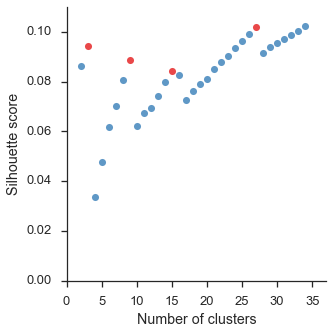

In [222]:
p = sns.lmplot('n_clusters', 'silhouette', hue='Local maxima', data=silhouettes, fit_reg=False, 
              scatter_kws={"s": 50}, palette = reversed(sns.color_palette('Set1', 2)), legend=False)
p.set_xlabels('Number of clusters')
p.set_ylabels('Silhouette score')
p.ax.set_ylim(0, 0.11)
p.ax.set_xlim(0, 37)
plt.savefig('../reports/dissertation/Figures/Silhouttes_FPN.pdf')

### Region names to numbers

In [4]:
k3_list = ['LPFC', 'IFS', 'CON']
k3 = {i:k+1 for k, i in enumerate(k3_list)}
k3_colors = sns.color_palette('Set1', 3)
k9_list = ['LPar', 'LPFC/preSMA', 'rIFS', 'VRPFC', 'lIFS', 'dIns', 'vIns', 'vMCC', 'dMCC']
k9 = {i:k+1 for k, i in enumerate(k9_list)}

k9_colors = sns.color_palette('Set1', 9)

k15_list = ['iLPar', 'sLPar', 'RLPFC', 'pSMA', 'DLPFC', 'rIFJ', 'rIFS', 'VRPFC', 'lIFJ', 'lIFS', 'dIns', 'vIns1', 'vIns2', 'vMCC', 'dMCC']
k15 = {i:k+1 for k, i in enumerate(k15_list)}

k9_frontal = [1, 2, 3, 4, 5]

k15_groups = {'LPFC/preSMA' : ['RLPFC', 'pSMA', 'DLPFC'], 'rIFS' : ['rIFJ', 'rIFS'], 'lIFS' : ['lIFJ', 'lIFS']}
colors = sns.color_palette('Set1', 9)
k15_colors = [(0, 0, 0)] * 2 +  colors[0:3] + [colors[5], colors[4], colors[3]] + colors[6:8] + [(0, 0, 0)] * 5

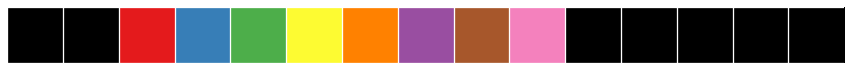

In [5]:
sns.palplot(k15_colors)

## Frontal regions, atlas comparison and co-activation

In [11]:
from base.coactivation import coactivation_contrast
%load_ext autoreload
%autoreload 2
from base.img_plot import make_thresholded_slices, plot_subset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
def calculate_probability(atlas_region, clusters):
     return np.array([atlas_region[clusters == i].mean() for i in range(1, clusters.max() + 1)])
    
def get_all_probabilities(atlas, clusters, labels):
    atlas = nib.load(atlas).get_data()
    clusters = nib.load(clusters).get_data()
    return pd.DataFrame(
        np.vstack([calculate_probability(atlas[:, :, :, i], clusters) for i in range(0, atlas.shape[3])]).T,
        columns = labels)

def compare_clusters_to_atlas(clusters, atlas='cort-prob-2mm'):
    from nilearn import datasets
    dataset = datasets.fetch_atlas_harvard_oxford(atlas)
    return get_all_probabilities(dataset.maps, clusters, dataset.labels[1:])

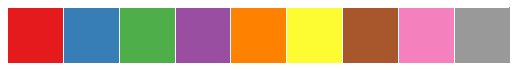

In [13]:
sns.palplot(sns.color_palette('Set1', 9))

### k = 3 -- frontal regions

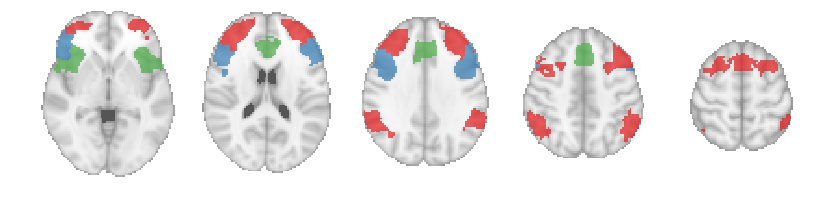

In [14]:
img = '../results/clustering/hierarchical/fastward_fpn_v6/flat_k3.nii'
colors = k3_colors
plot_subset(img, [1, 2, 3], draw_cross=False, display_mode='z', cut_coords=[-2, 18, 32, 46, 58], colors=colors, annotate=False)
# plt.savefig('../reports/dissertation/Figures/k9_frontal_regions.png')

/Users/aleph4/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


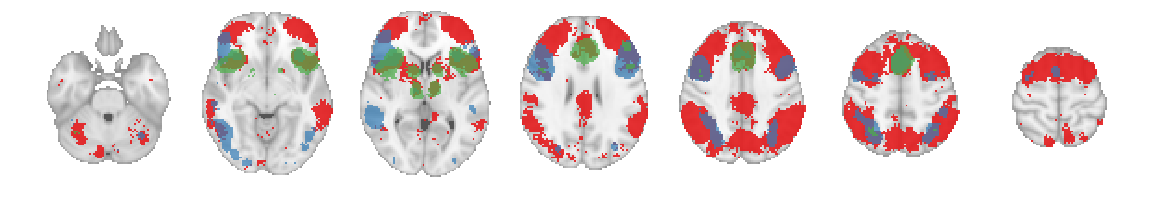

In [15]:
c = coactivation_contrast(dataset, img, 
                                   regions=[1, 2, 3], target_thresh=0.05, other_thresh=0.01, q=0.000001)
make_thresholded_slices(c, colors, annotate=False)

### k = 9 -- frontal regions

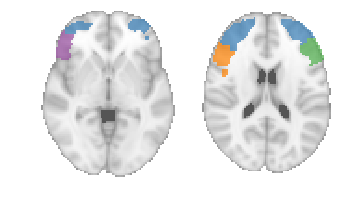

In [16]:
img = '../results/clustering/hierarchical/fastward_fpn_v6/flat_k9.nii'
colors = np.array(k9_colors)[np.array(k9_frontal) - 1]
plot_subset(img, k9_frontal[1:], draw_cross=False, display_mode='z', cut_coords=[-2, 18], colors=colors[1:], annotate=False)
plt.savefig('../reports/dissertation/Figures/k9_frontal_regions.png')

In [17]:
nine_ho = compare_clusters_to_atlas(img)
nine_ho_frontal = nine_ho.loc[0:4]

In [18]:
nine_ho_columns = nine_ho_frontal.loc[:, nine_ho_frontal.mean() > 2].columns

In [19]:
all_ho_columns = ['Angular Gyrus',
                  'Supramarginal Gyrus, posterior division',
                  'Superior Frontal Gyrus',
 'Frontal Pole',
 'Inferior Frontal Gyrus, pars opercularis',
 'Inferior Frontal Gyrus, pars triangularis',
 'Middle Frontal Gyrus',
 'Precentral Gyrus',
 ]

/Users/aleph4/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:134: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/aleph4/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:142: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


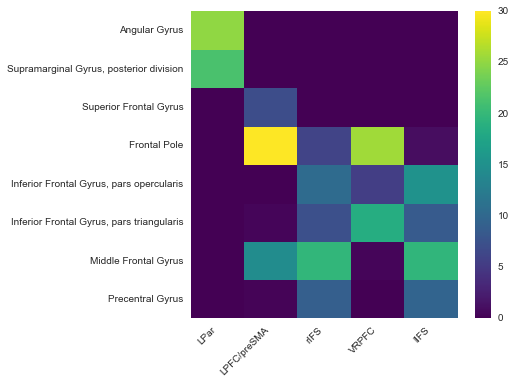

In [20]:
plt.figure(figsize=(6, 5.5))
p = sns.heatmap(nine_ho_frontal.loc[:, all_ho_columns].T,cmap=plt.get_cmap('viridis'), 
                   vmax=30)
_ = p.set_yticklabels(p.get_yticklabels(), rotation=0)
_ = p.set_xticklabels(k9_list, rotation=45, ha='right')
plt.savefig('../reports/dissertation/Figures/k9_frontal_ho.pdf', bbox_inches='tight')

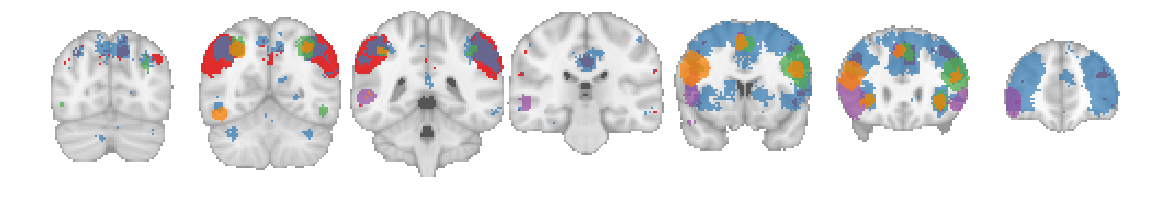

In [21]:
c = coactivation_contrast(dataset, img, 
                                   regions=k9_frontal, target_thresh=0.05, other_thresh=0.01, q=0.0000001)
make_thresholded_slices(c, colors, display_mode='y', annotate=False)
# plt.savefig('../reports/dissertation/Figures/k9_frontal_coact.png')

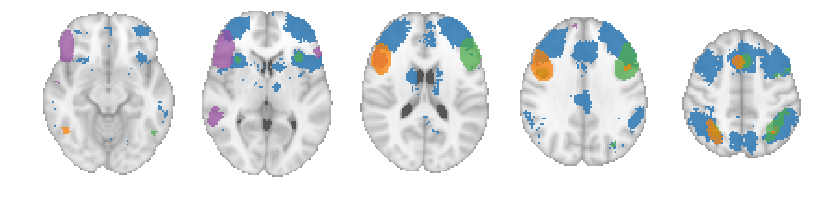

In [22]:
c = coactivation_contrast(dataset, img, 
                                   regions=k9_frontal[1:], target_thresh=0.05, other_thresh=0.01, q=0.0000001)
make_thresholded_slices(c, colors[1:], cut_coords=np.arange(-12, 55, 15), annotate=False)

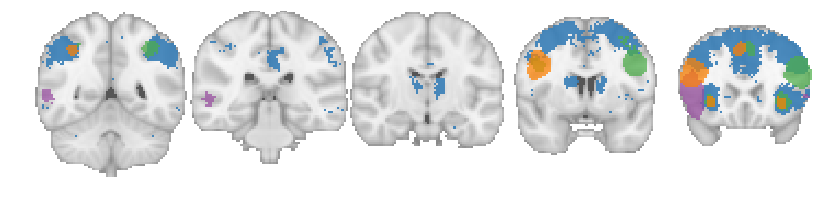

In [23]:
c = coactivation_contrast(dataset, img, 
                                   regions=k9_frontal[1:], target_thresh=0.05, other_thresh=0.01, q=0.0000001)
make_thresholded_slices(c, colors[1:], display_mode='y', cut_coords=np.arange(-50, 26, 18), annotate=False)

### k = 15

### All regions

In [24]:
img = '../results/clustering/hierarchical/fastward_fpn_v6/flat_k15.nii'
rois = ['RLPFC', 'pSMA', 'DLPFC', 'rIFJ', 'rIFS', 'VRPFC', 'lIFJ', 'lIFS']
regions = sorted([i for k, i in k15.iteritems() if k in rois])
colors = [c for i, c in enumerate(k15_colors) if i+1 in regions]

In [25]:
regions

[3, 4, 5, 6, 7, 8, 9, 10]

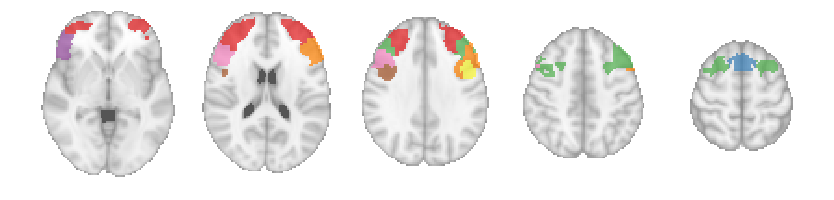

In [26]:
plot_subset(img, regions, draw_cross=False, display_mode='z', cut_coords=[-2, 18, 32, 46, 58], colors=colors, annotate=False)
plt.savefig('../reports/dissertation/Figures/k15_frontal_regions.png')

### k=9 regions

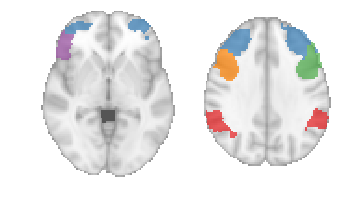

In [27]:
img = '../results/clustering/hierarchical/fastward_fpn_v6/flat_k9.nii'
rois = ['LPFC/preSMA', 'LPar', 'VRPFC', 'rIFS', 'lIFS']
regions = sorted([i for k, i in k9.iteritems() if k in rois])
colors = [c for i, c in enumerate(k9_colors) if i+1 in regions]
plot_subset(img, regions, draw_cross=False, display_mode='z', cut_coords=[-2,32], colors=colors, annotate=False)
plt.savefig('../reports/dissertation/Figures/k9_.png')

### k=15 functional legend


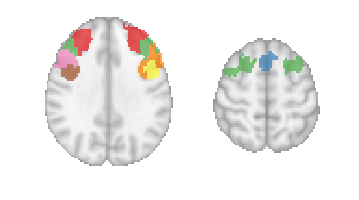

In [28]:
img = '../results/clustering/hierarchical/fastward_fpn_v6/flat_k15.nii'
rois = ['DLPFC', 'RLPFC', 'pSMA', 'rIFJ', 'lIFJ', 'rIFS', 'lIFS', 'VRPFC']
regions = sorted([i for k, i in k15.iteritems() if k in rois])
colors = [c for i, c in enumerate(k15_colors) if i+1 in regions]
plot_subset(img, regions, draw_cross=False, display_mode='z', cut_coords=[32, 55], colors=colors, annotate=False)
plt.savefig('../reports/dissertation/Figures/k15_legend.png')

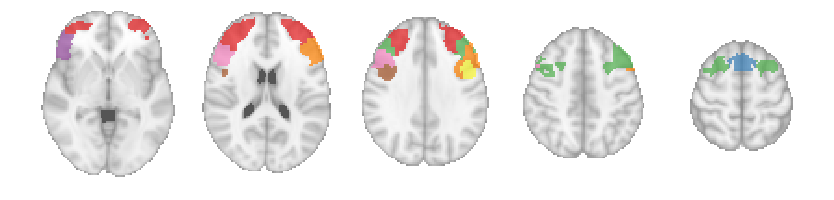

In [29]:
plot_subset(img, regions, draw_cross=False, display_mode='z', cut_coords=[-2, 18, 31, 46, 58], colors=colors, annotate=False)
plt.savefig('../reports/dissertation/Figures/k15_frontal_regions.png')

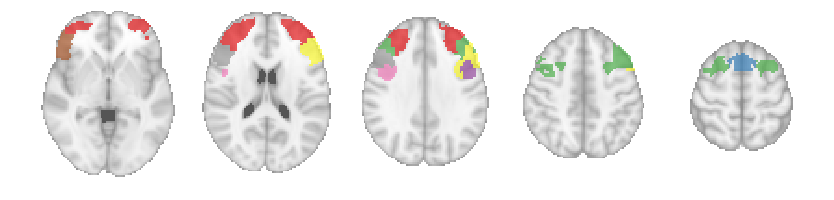

In [30]:
plot_subset(img, regions, draw_cross=False, display_mode='z', cut_coords=[-2, 18, 31, 46, 58], annotate=False)


In [31]:
regions

[3, 4, 5, 6, 7, 8, 9, 10]

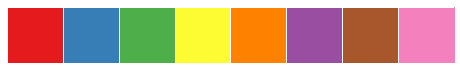

In [32]:
sns.palplot(colors)

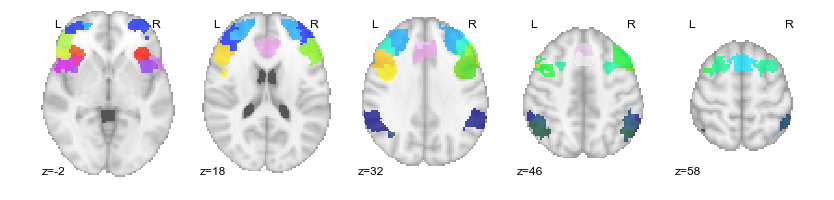

In [33]:
niplt.plot_roi( '../results/clustering/hierarchical/fastward_fpn_v6/flat_k27.nii', display_mode='z', cut_coords=[-2, 18, 32, 46, 58],
              )

In [34]:
rois = ['RLPFC','DLPFC', 'rIFJ', 'rIFS', 'VRPFC', 'lIFJ', 'lIFS']
regions = sorted([i for k, i in k15.iteritems() if k in rois])
colors = [c for i, c in enumerate(k15_colors) if i+1 in regions]

In [35]:
?sns.color_palette

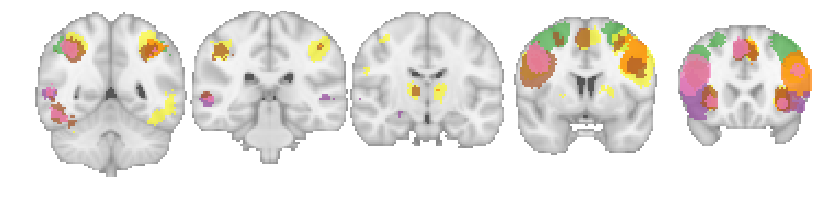

In [36]:
c = coactivation_contrast(dataset, img, 
                                   regions=regions, target_thresh=0.01, other_thresh=0.01, q=0.001)
make_thresholded_slices(c, colors, display_mode='y', annotate=False, cut_coords=np.arange(-50, 26, 18))
# plt.savefig('../reports/dissertation/Figures/k15_LPFC_coact.png')

In [37]:
fifteen_ho = compare_clusters_to_atlas(img)
frontal_15_ho = fifteen_ho.loc[np.array(regions) - 1]

In [38]:
frontal_15_columns = frontal_15_ho.loc[:, frontal_15_ho.mean() > 2].columns

In [39]:
set(frontal_15_columns) | set(nine_ho_columns)

{'Angular Gyrus',
 'Frontal Pole',
 'Inferior Frontal Gyrus, pars opercularis',
 'Inferior Frontal Gyrus, pars triangularis',
 'Middle Frontal Gyrus',
 'Precentral Gyrus',
 'Supramarginal Gyrus, posterior division'}

/Users/aleph4/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:134: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/aleph4/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:142: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


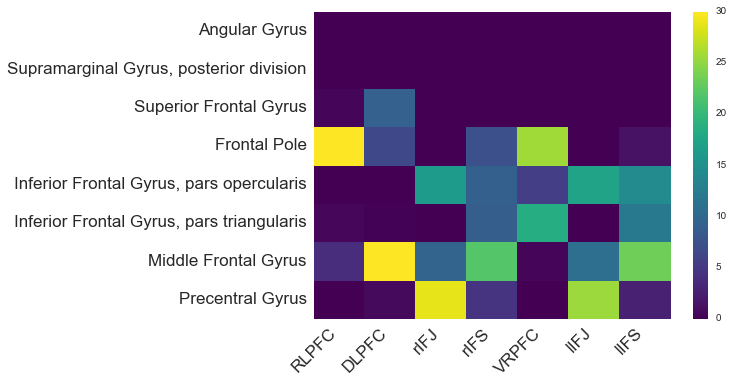

In [40]:
p = sns.heatmap(frontal_15_ho.loc[:, all_ho_columns].T, cmap=plt.get_cmap('viridis'), vmax=30)
_ = p.set_yticklabels(p.get_yticklabels(), rotation=0, size=17)
_ = p.set_xticklabels(rois, rotation=45, ha='right', size=17)
plt.savefig('../reports/dissertation/Figures/k15_frontal_ho.pdf', bbox_inches='tight')

### Compare to Neubert & Sallet

In [41]:
import csv

In [42]:
neu_labels = [k[' label'].strip() for k in csv.DictReader(open('../masks/mars/NeubertVentralFrontalParcellation/NeubertVentralFrontalParcellation.csv', 'r'))]
sallet_labels = [k[' label'].strip() for k in csv.DictReader(open('../masks/mars/SalletDorsalFrontalParcellation/SalletDorsalFrontalParcellation.csv', 'r'))]

In [43]:
fifteen_neubert = get_all_probabilities(
    '../masks/mars/NeubertVentralFrontalParcellation/NeubertVentralFrontalParcellation/VentralFrontal_thr25_2mm.nii.gz',
    img, neu_labels)
fifteen_sallet = get_all_probabilities(
    '../masks/mars/SalletDorsalFrontalParcellation/SalletDorsalFrontalParcellation/DorsalFrontal_thr25_2mm.nii.gz',
    img, sallet_labels)

In [44]:
mars_fifteen = pd.concat([fifteen_sallet, fifteen_neubert], axis=1)

In [45]:
neubert_compare_regions = [3, 4, 5, 6, 7]

/Users/aleph4/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:134: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/aleph4/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:142: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


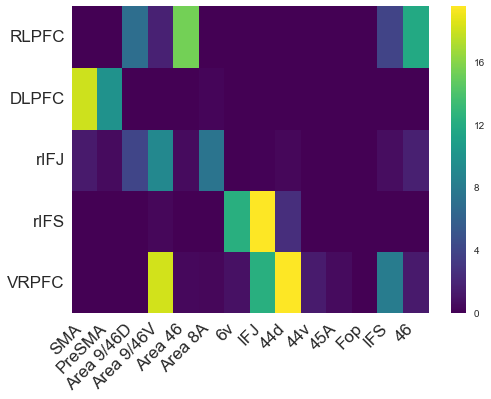

In [46]:
p = sns.heatmap(mars_fifteen.loc[np.array(neubert_compare_regions) - 1, mars_fifteen.mean() > .5], cmap=plt.get_cmap('viridis'), robust=True)
_ = p.set_yticklabels(reversed(rois[0:5]), rotation=0, size=17)
_ = p.set_xticklabels(p.get_xticklabels(), rotation=45, ha='right', size=17)
# plt.savefig('../reports/dissertation/Figures/k15_frontal_ho.pdf', bbox_inches='tight')

#### LPFC / preSMA

In [47]:
regions = sorted([i for k, i in k15.iteritems() if k in ['RLPFC', 'DLPFC']])
colors = [c for i, c in enumerate(k15_colors) if i+1 in regions]

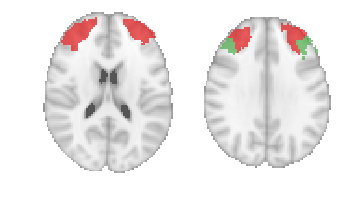

In [48]:
plot_subset(img, regions, draw_cross=False, display_mode='z', cut_coords=[18, 30], colors=colors, annotate=False)
plt.savefig('../reports/dissertation/Figures/k15_LPFC.png')

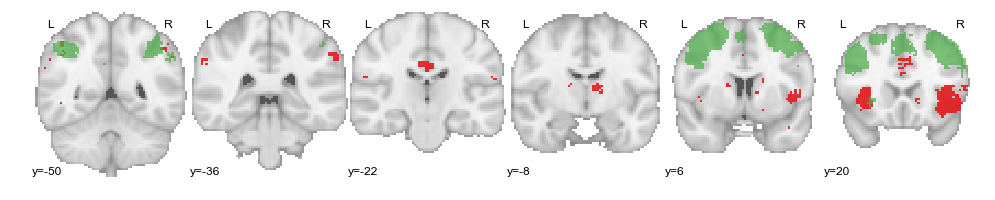

In [49]:
c = coactivation_contrast(dataset, img, 
                                   regions=regions, target_thresh=0.05, other_thresh=0.01, q=0.0001)
make_thresholded_slices(c, colors, display_mode='y', annotate=True, cut_coords=np.arange(-50, 26, 14))
# plt.savefig('../reports/dissertation/Figures/k15_LPFC_coact.png')

#### rIFS

In [50]:
regions = sorted([i for k, i in k15.iteritems() if k in ['rIFS', 'rIFJ']])
colors = [c for i, c in enumerate(k15_colors) if i+1 in regions]

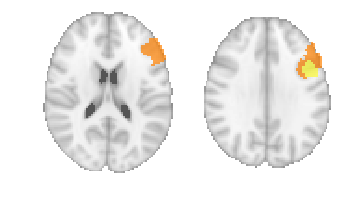

In [51]:
plot_subset(img, regions, draw_cross=False, display_mode='z',  cut_coords=[18, 30],  colors=colors, annotate=False)
plt.savefig('../reports/dissertation/Figures/k15_rIFS.png')

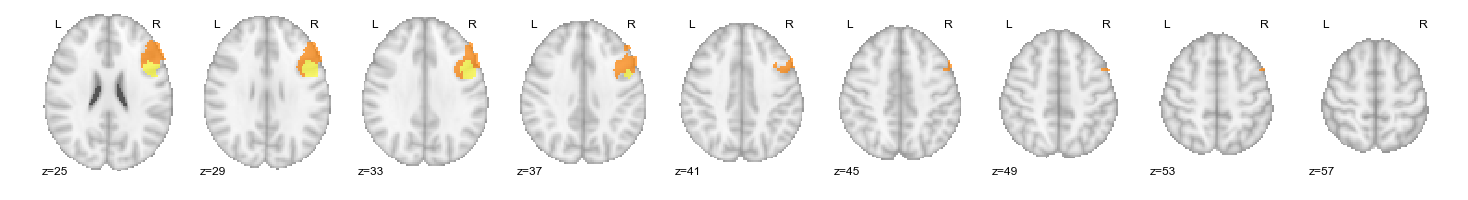

In [52]:
plot_subset(img, regions, draw_cross=False, display_mode='z',  cut_coords=np.arange(25, 60, 4),  colors=colors, annotate=True)

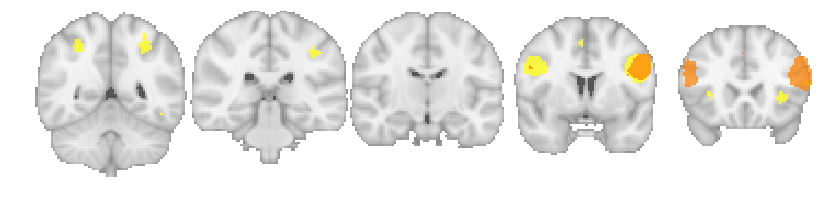

In [53]:
c = coactivation_contrast(dataset, img, 
                                   regions=regions, target_thresh=0.05, other_thresh=0.01, q=0.05)
make_thresholded_slices(c, colors, display_mode='y', annotate=False, cut_coords=np.arange(-50, 26, 18))
# plt.savefig('../reports/dissertation/Figures/k15_rIFS_coact.png')

#### lIFS

In [54]:
regions = sorted([i for k, i in k15.iteritems() if k in ['lIFS', 'lIFJ']])
colors = [c for i, c in enumerate(k15_colors) if i+1 in regions]

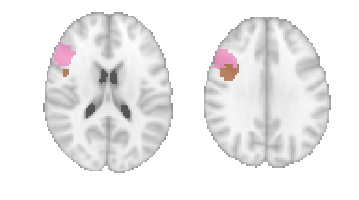

In [55]:
plot_subset(img, regions, draw_cross=False, display_mode='z',  cut_coords=[18, 30],  colors=colors, annotate=False)
plt.savefig('../reports/dissertation/Figures/k15_lIFS.png')

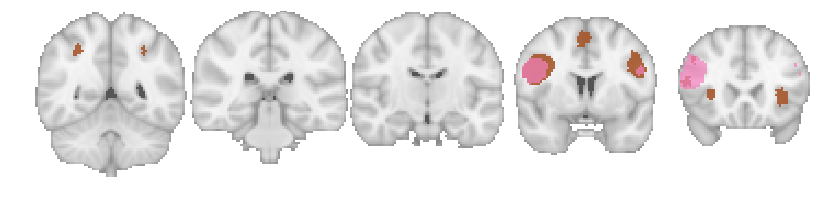

In [56]:
c = coactivation_contrast(dataset, img, 
                                   regions=regions, target_thresh=0.05, other_thresh=0.01, q=0.05)
make_thresholded_slices(c, colors, cut_coords=np.arange(-50, 26, 18), display_mode='y', annotate=False)
plt.savefig('../reports/dissertation/Figures/k15_lIFS_coact.png')

# Functional profiles

In [6]:
%aimport base.plotting

In [7]:
clf_3 = OnevsallClassifier.load('../results/classification/tpn_v6_k3_GNB_t0.05_all_topics_60/classifier_nd.pkl')
clf_9 = OnevsallClassifier.load('../results/classification/tpn_v6_k9_GNB_t0.05_all_topics_60/classifier_nd.pkl')
clf_15 = OnevsallClassifier.load('../results/classification/tpn_v6_k15_GNB_t0.05_all_topics_60/classifier_nd.pkl')

In [8]:
def calculate_odds_ratio(thetas, f=0.1):
    t = thetas + f
    return np.log((t[:, 1, :] / t[:, 0, :]))

In [9]:
## Topic nicknames
nicknames = pd.read_csv('../data/0.6/topics/keys/v4-topics-60.txt', delimiter='\t')
nicknames['topic_name'] = nicknames.apply(lambda row: '_'.join([str(row.topic_number)] + row.top_words.split(' ')[0:3]), axis=1)
nicknames = nicknames.sort_values('topic_name')

In [10]:
ml.style.use('seaborn-dark')

### k = 3

In [101]:
all_labels = [ 'semantics',
 'reading',
 'conflict',
 'switching',
 'WM',
 'arithmetic',
               'inhibition',

 'novelty',
              'LTM',
 'errors',
'fear',
 'action',
]

In [86]:
sns.set_style('dark')

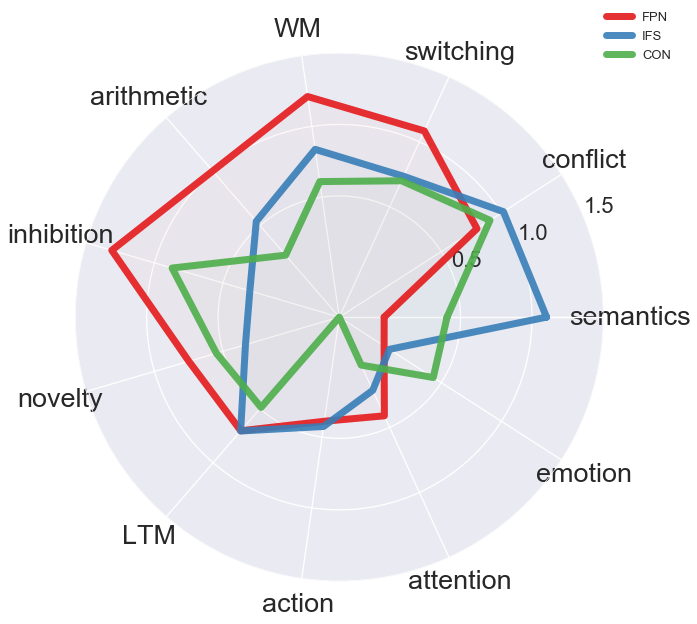

In [87]:
_ =  base.plotting.plot_clf_polar_v6(clf_3, key='topic', label_size=27, cmap=k3_colors, feature_names=nicknames.nickname,
                                   labels=all_labels, reorder=False, max_val=1.5, legend=True, col_names = ['FPN', 'IFS', 'CON'])
plt.savefig('../reports/dissertation/Figures/3_function.png')

### k = 9

### FP

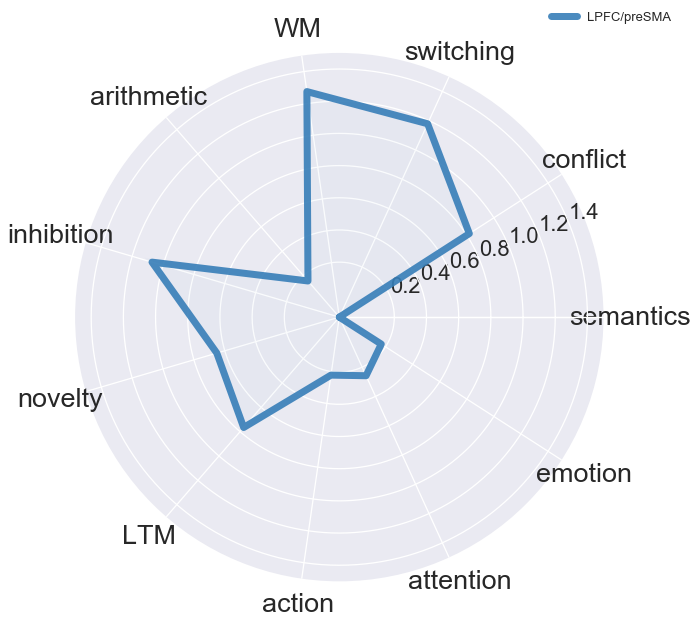

In [88]:
region_names = ['LPFC/preSMA']
regions = sorted([i for k, i in k9.iteritems() if k in region_names])
_ = base.plotting.plot_clf_polar_v6(clf_9, mask=regions, key='topic', label_size=27, cmap=k9_colors, labels=all_labels,
                                   max_val=1.5, feature_names=nicknames.nickname, col_names=region_names, legend=True)
# plt.savefig('../reports/dissertation/Figures/6_FP_function.pdf')

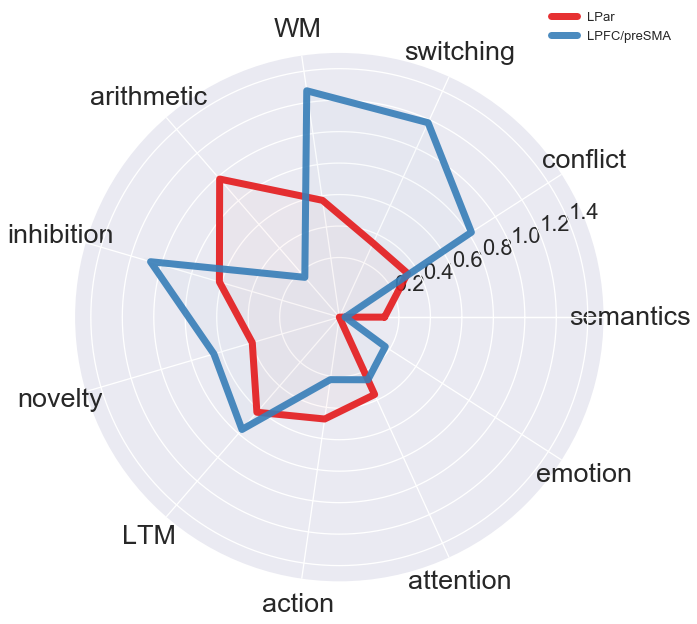

In [89]:
region_names = ['LPar', 'LPFC/preSMA']
regions = sorted([i for k, i in k9.iteritems() if k in region_names])
_ = base.plotting.plot_clf_polar_v6(clf_9, mask=regions, key='topic', label_size=27, cmap=k9_colors, labels=all_labels,
                                   max_val=1.5, feature_names=nicknames.nickname, col_names=region_names, legend=True)
plt.savefig('../reports/dissertation/Figures/6_FP_function.pdf')

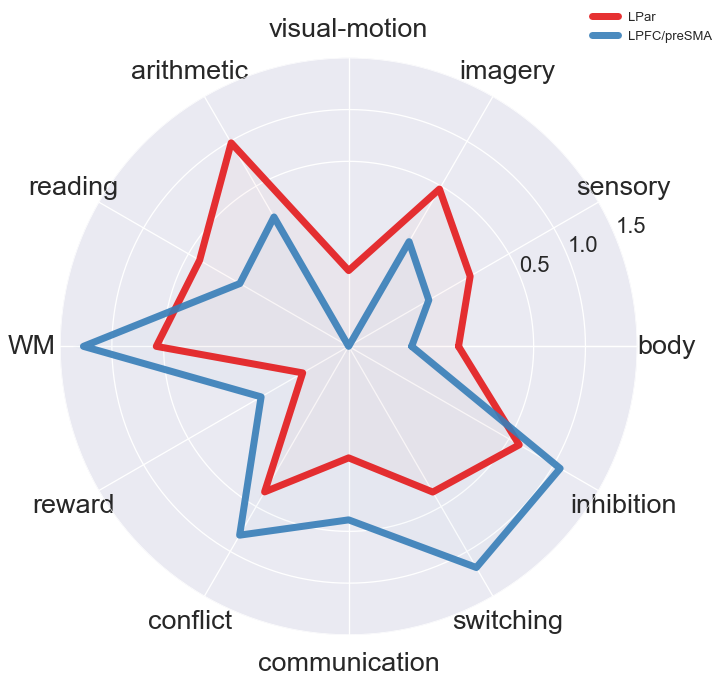

In [90]:
region_names = ['LPar', 'LPFC/preSMA']
regions = sorted([i for k, i in k9.iteritems() if k in region_names])
_ = base.plotting.plot_clf_polar_v6(clf_9, mask=regions, key='topic', label_size=27, cmap=k9_colors, 
                                   max_val=1.5, feature_names=nicknames.nickname, col_names=region_names, legend=True, reorder=True, selection='std', n_top=12)

In [91]:
region_names

['LPar', 'LPFC/preSMA']

### IFS

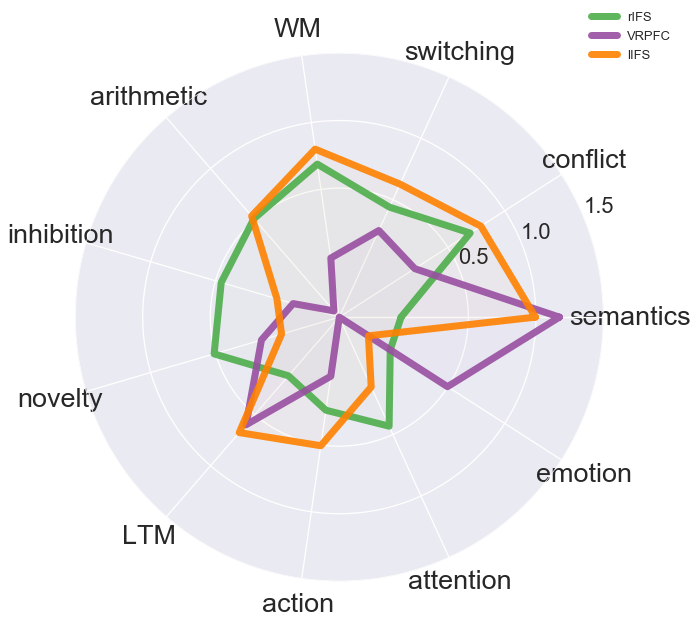

In [92]:
region_names = ['rIFS', 'VRPFC', 'lIFS']
regions = sorted([i for k, i in k9.iteritems() if k in region_names])
_ = base.plotting.plot_clf_polar_v6(clf_9, mask=regions, key='topic', label_size=27, cmap=k9_colors, labels=all_labels,
                                   max_val=1.5, feature_names=nicknames.nickname, col_names=region_names, legend=True)
plt.savefig('../reports/dissertation/Figures/6_IFS_function.pdf')

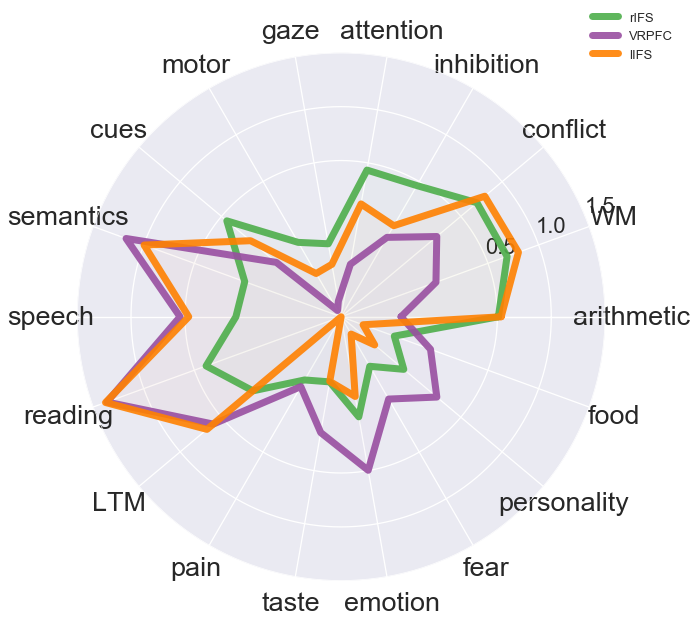

In [93]:
region_names = ['rIFS', 'VRPFC', 'lIFS']
regions = sorted([i for k, i in k9.iteritems() if k in region_names])
_ = base.plotting.plot_clf_polar_v6(clf_9, mask=regions, key='topic', label_size=27, cmap=k9_colors, selection='std', n_top=18, reorder=True,
                                   max_val=1.5, feature_names=nicknames.nickname, col_names=region_names, legend=True)

### k = 15

### LPFC/preSMA

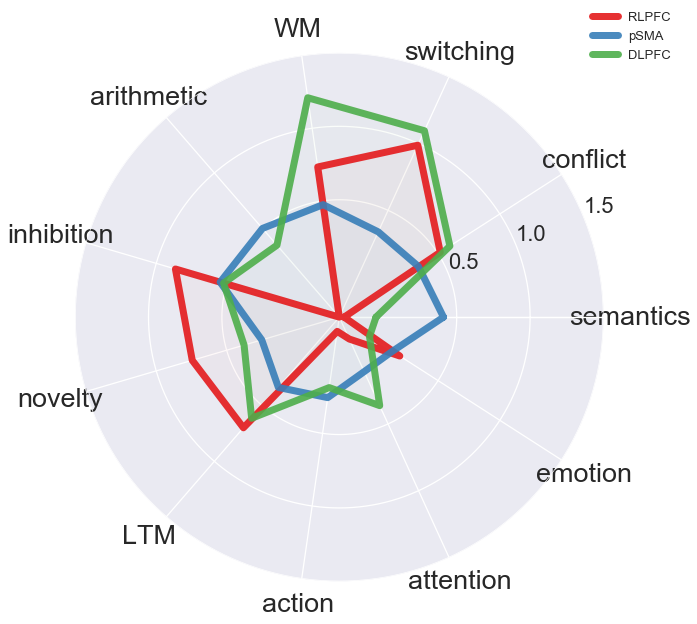

In [94]:
region_names = ['RLPFC', 'pSMA', 'DLPFC']
regions = sorted([i for k, i in k15.iteritems() if k in region_names])
_ = base.plotting.plot_clf_polar_v6(clf_15, mask=regions, key='topic', label_size=27, cmap=k15_colors, labels=all_labels,
                                   max_val=1.5, feature_names=nicknames.nickname, col_names=region_names, legend=True)
plt.savefig('../reports/dissertation/Figures/15_LPFC_preSMA_function.pdf')

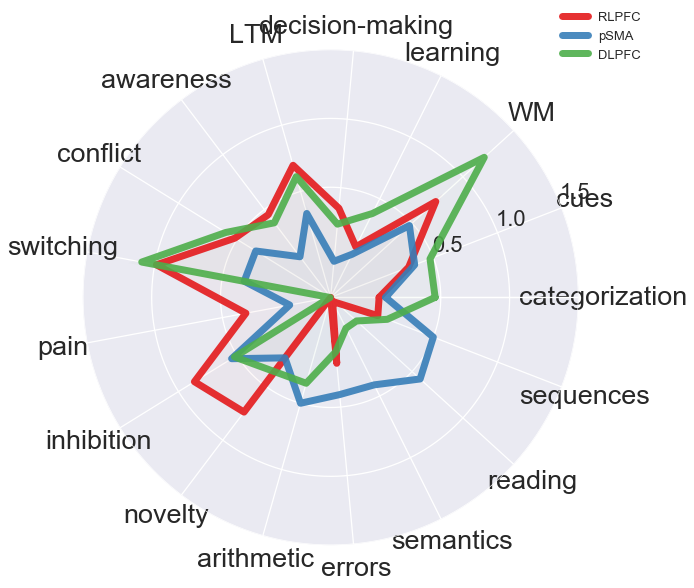

In [95]:
region_names = ['RLPFC', 'pSMA', 'DLPFC']
regions = sorted([i for k, i in k15.iteritems() if k in region_names])
_ = base.plotting.plot_clf_polar_v6(clf_15, mask=regions, key='topic', label_size=27, cmap=k15_colors, n_top=10, reorder=True,
                                   max_val=1.5, feature_names=nicknames.nickname, col_names=region_names, legend=True)

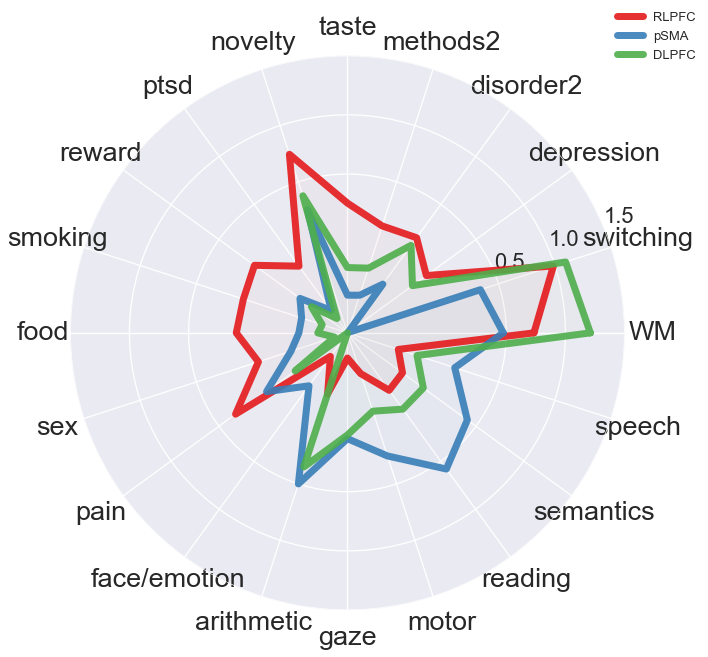

In [96]:
region_names = ['RLPFC', 'pSMA', 'DLPFC']
regions = sorted([i for k, i in k15.iteritems() if k in region_names])
_ = base.plotting.plot_clf_polar_v6(clf_15, mask=regions, key='topic', label_size=27, cmap=k15_colors, selection='std', n_top=20, reorder=True,
                                   max_val=1.5, feature_names=nicknames.nickname, col_names=region_names, legend=True)

### right IFS

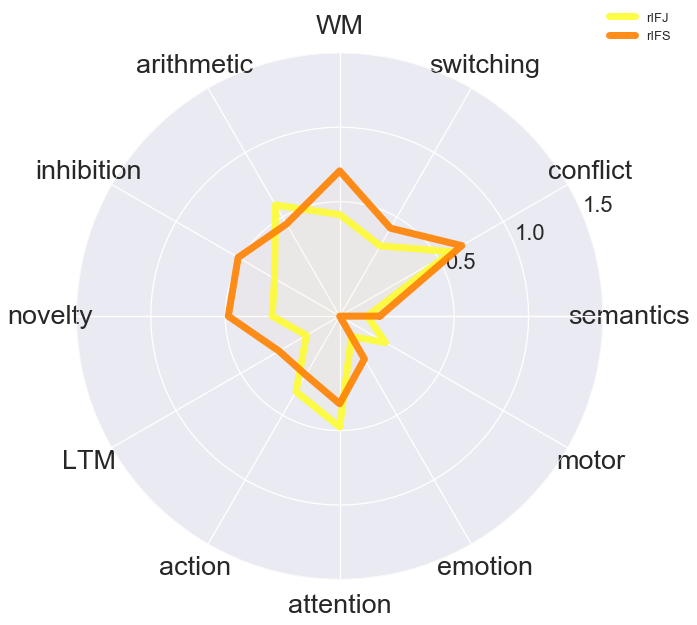

In [97]:
region_names = ['rIFJ', 'rIFS']
regions = sorted([i for k, i in k15.iteritems() if k in region_names])
_ = base.plotting.plot_clf_polar_v6(clf_15, mask=regions, key='topic', label_size=27, cmap=k15_colors, labels=all_labels + ['motor'],
                                   max_val=1.5, feature_names=nicknames.nickname, legend=True, col_names=region_names)
plt.savefig('../reports/dissertation/Figures/15_rIFS_function.pdf')

### left IFS

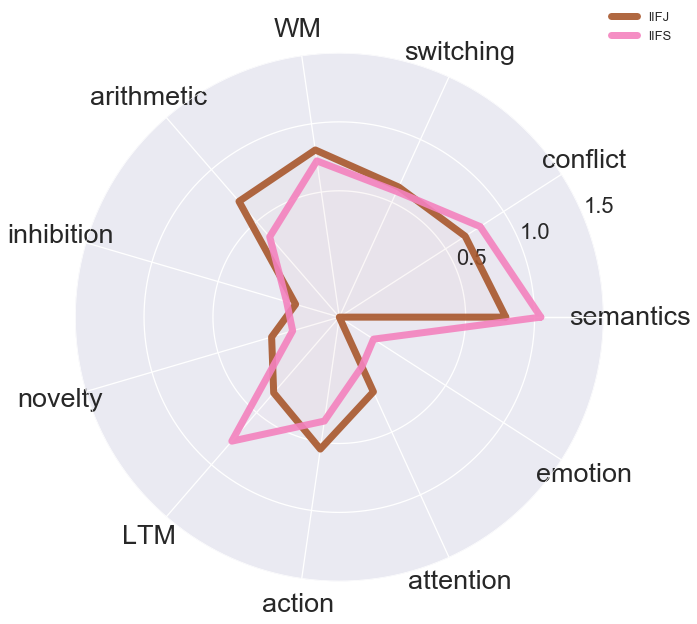

In [98]:
region_names = ['lIFJ', 'lIFS']
regions = sorted([i for k, i in k15.iteritems() if k in region_names])
_ = base.plotting.plot_clf_polar_v6(clf_15, mask=regions, key='topic', label_size=27, cmap=k15_colors, labels=all_labels,
                                   max_val=1.5, feature_names=nicknames.nickname, col_names=region_names, legend=True)
plt.savefig('../reports/dissertation/Figures/15_lIFS_function.pdf')

### All IFS

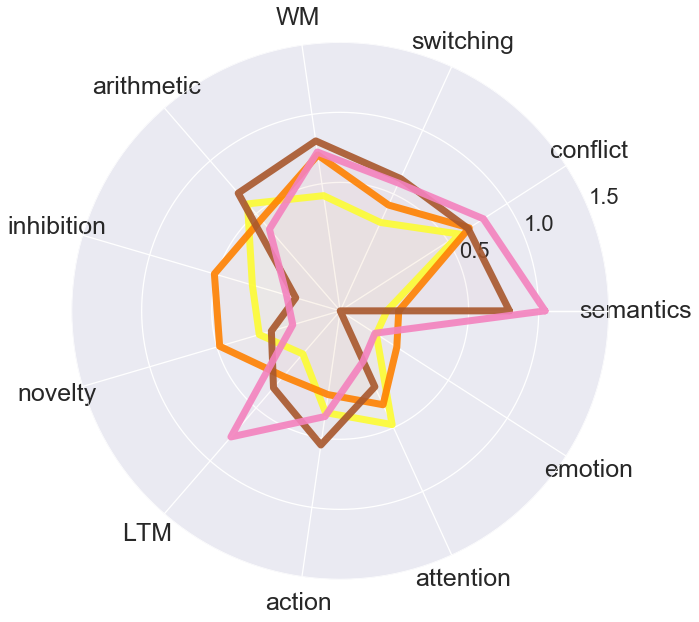

In [99]:
regions = sorted([i for k, i in k15.iteritems() if k in ['lIFJ', 'lIFS', 'rIFS', 'rIFJ']])
_ = base.plotting.plot_clf_polar_v6(clf_15, mask=regions, key='topic', label_size=25, cmap=k15_colors, labels=all_labels,
                                   max_val=1.5, feature_names=nicknames.nickname)

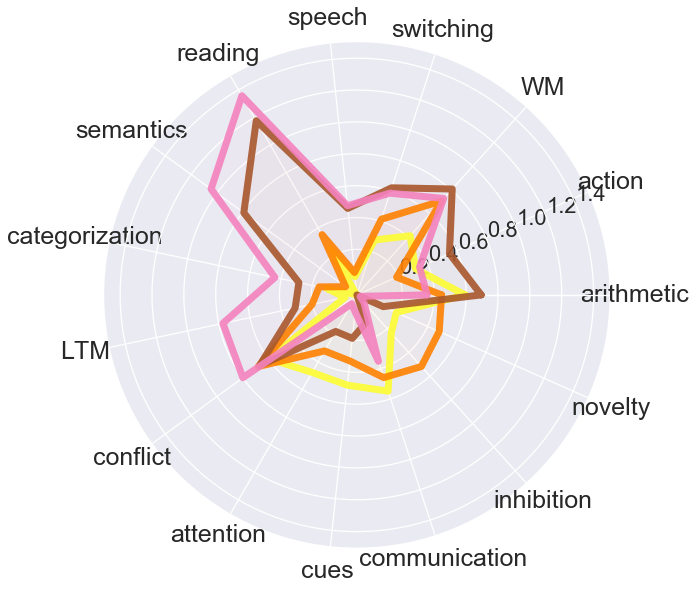

In [100]:
regions = sorted([i for k, i in k15.iteritems() if k in ['lIFJ', 'lIFS', 'rIFS', 'rIFJ']])
_ = base.plotting.plot_clf_polar_v6(clf_15, mask=regions, key='topic', label_size=25, cmap=k15_colors, selection='top', n_top=10, reorder=True,
                                   max_val=1.5, feature_names=nicknames.nickname)

### Functional distance

In [40]:
from base.tools import mask_diagonal
from sklearn.metrics import pairwise_distances

In [153]:
k15_frontal = ['DLPFC', 'pSMA', 'RLPFC', 'rIFS', 'rIFJ', 'lIFS', 'lIFJ', 'VRPFC']

In [164]:
odds_ratio_distance = pd.DataFrame(pairwise_distances(clf_15.odds_ratio, metric='correlation'), index=k15_list, columns=k15_list)
odds_ratio_distance =  odds_ratio_distance.ix[k15_frontal][k15_frontal]

In [165]:
mask= mask_diagonal(np.ma.masked_array(odds_ratio_distance.values)).mask

In [ ]:
p.ax_heatmap.set_y

/Users/aleph4/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:134: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/aleph4/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:142: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


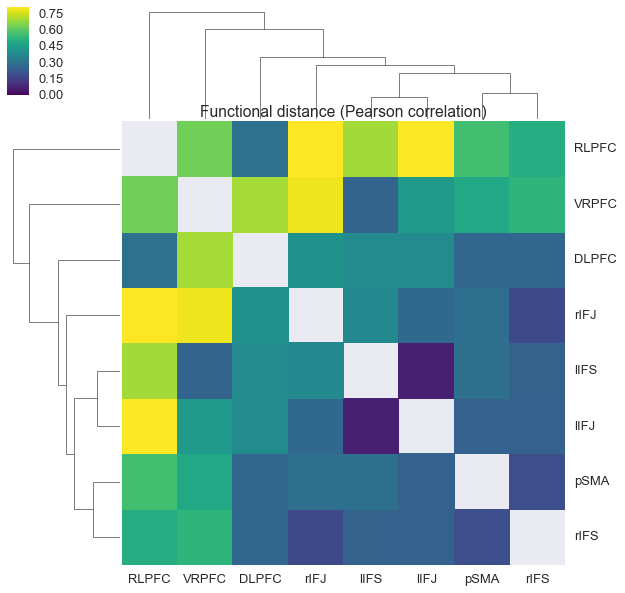

In [171]:
p = sns.clustermap(odds_ratio_distance.ix[k15_frontal][k15_frontal], cmap='viridis', robust=True, mask=mask)
_ = p.ax_heatmap.set_yticklabels(p.ax_heatmap.get_yticklabels(), rotation=0, )
p.ax_heatmap.set_title('Functional distance (Pearson correlation)')
plt.savefig('../reports/dissertation/Figures/TPN_LF_distance.pdf')

/Users/aleph4/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:134: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/aleph4/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:142: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


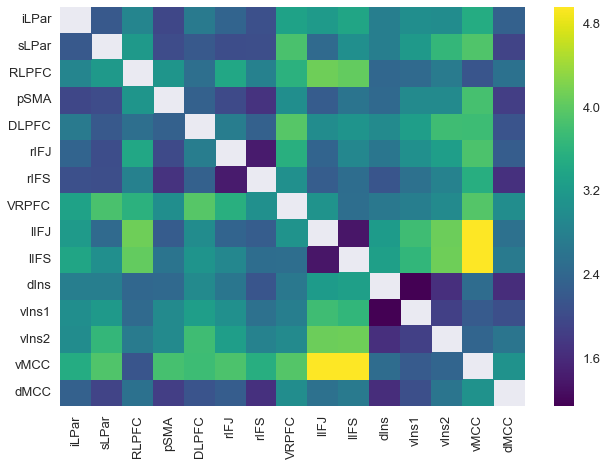

In [127]:
sns.heatmap(odds_ratio_distance, cmap='viridis')

### Brain activation rate

In [77]:
avg_act = dataset.image_table.data.mean(axis=1).squeeze()
avg_act = np.array(avg_act).squeeze()
avg_act = dataset.masker.unmask(avg_act)

In [78]:
avg_act_img = nib.Nifti1Image(avg_act, dataset.masker.get_header().get_best_affine())

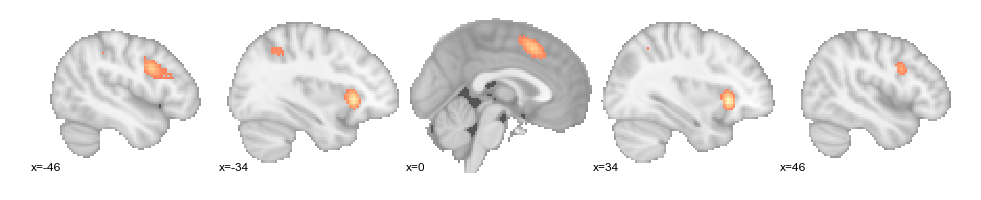

In [79]:
niplt.plot_stat_map(avg_act_img, cmap='magma', colorbar=False, draw_cross=False, threshold=0.05,
                    display_mode='x',
                   cut_coords=[-46, -34, 0, 34, 46])

In [80]:
avg_act.max()

0.10669822900227952

## Permutation test

In [12]:
from multiprocessing import Pool
# pool = Pool(processes=4)
pool = itertools
from base import tools

In [13]:
import scipy.stats as st

In [14]:
clf_3.dataset = dataset
clf_9.dataset = dataset
clf_15.dataset = dataset

clf_3.load_data(None, None)
clf_9.load_data(None, None)
clf_15.load_data(None, None)

Loading data from neurosynth...
[##########] 100%
Loading data from neurosynth...
[##########] 100%
Loading data from neurosynth...
[##########] 100%


In [15]:
def permutation_parallel(args):
    (X, y, cla, feat_names, region), i = args
    
    newY = np.random.permutation(y)
    cla_fits = cla.fit(X, newY)
    fit_w = np.log(cla_fits.theta_[1] / cla_fits.theta_[0])
    
    results = []
    for n, lo in enumerate(fit_w):
        results.append([region + 1, i, feat_names[n], lo])
        
    return results

def permute_log_odds(clf, boot_n, feature_names=None):
    def z_score_array(arr, dist):
        return np.array([(v - dist[dist.region == i + 1].lor.mean()) / dist[dist.region == i + 1].lor.std() 
                         for i, v in enumerate(arr.tolist())])
                                           
    pb = tools.ProgressBar(boot_n * len(clf.data), start=True)
    overall_results = []
    
    if feature_names is None:
        feature_names = clf.feature_names
    
    for reg, (X, y) in enumerate(clf.data):
        for result in pool.imap(permutation_parallel, itertools.izip(
                itertools.repeat((X, y, clf.classifier, feature_names, reg)), range(boot_n))):
            for res in result:
                overall_results.append(res)
            pb.next()
                                               
    perm_results = pd.DataFrame(overall_results, columns=['region', 'perm_n', 'topic_name', 'lor'])
    lor = pd.DataFrame(clf.odds_ratio, index=range(1, clf.odds_ratio.shape[0] + 1), columns=feature_names)
                                           
    
    return lor.apply(lambda x: z_score_array(x, perm_results[perm_results.topic_name == x.name]))

In [16]:
clf_3_lor_z = permute_log_odds(clf_3, 1000, feature_names=nicknames.nickname)

[##########] 100%


In [17]:
clf_9_lor_z = permute_log_odds(clf_9, 1000, feature_names=nicknames.nickname)

[##########] 100%


In [18]:
clf_15_lor_z = permute_log_odds(clf_15, 1000, feature_names=nicknames.nickname)

[##########] 100%


In [19]:
clf_3_lor_z.index = k3_list
clf_9_lor_z.index = k9_list
clf_15_lor_z.index = k15_list

In [20]:
clf_15_lor_z.index = ['iLPar',
 'sLPar',
 'RLPFC',
 'pSMA',
 'DLPFC',
 'rIFJ',
 'rIFS2',
 'VRPFC1',
 'lIFJ',
 'lIFS2',
 'dIns',
 'vIns1',
 'vIns2',
 'vMCC',
 'dMCC']

In [104]:
rois = ['LPar', 'LPFC/preSMA', 'rIFS', 'VRPFC', 'lIFS'] + ['RLPFC', 'pSMA', 'DLPFC', 'rIFJ', 'rIFS2', 'lIFJ', 'lIFS2'] + ['LPFC', 'IFS', 'CON']

all_roi_z = pd.melt(pd.concat([clf_3_lor_z, clf_9_lor_z, clf_15_lor_z]).reset_index(),value_name='lor_z', id_vars='index')

all_roi_z = all_roi_z.rename(columns={'index' : 'ROI'})

all_roi_z['p'] = (1 - st.norm.cdf(all_roi_z.lor_z.abs())) * 2

select_ps = all_roi_z[all_roi_z.nickname.isin(all_labels) * all_roi_z.ROI.isin(rois)]

In [117]:
from statsmodels.sandbox.stats.multicomp import multipletests

reject, p_corr, a, a1 = multipletests(select_ps.p, alpha=0.001, method='fdr_tsbky')

select_ps['reject_001'] = reject
select_ps['p_corr_001'] = p_corr

reject, p_corr, a, a1 = multipletests(select_ps.p, alpha=0.01, method='fdr_tsbky')

select_ps['reject_01'] = reject
select_ps['p_corr_01'] = p_corr


reject, p_corr, a, a1 = multipletests(select_ps.p, alpha=0.05, method='fdr_tsbky')

select_ps['reject_05'] = reject
select_ps['p_corr_05'] = p_corr

-c:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
-c:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
-c:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
-c:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [106]:
select_ps.pivot(index='ROI', columns='nickname', values='reject_01').loc[['LPFC', 'IFS', 'CON'], all_labels]

nickname,semantics,reading,conflict,switching,WM,arithmetic,inhibition,novelty,LTM,errors,fear,action
ROI,,,,,,,,,,,,
LPFC,False,False,True,True,True,True,True,True,True,False,True,False
IFS,True,True,True,True,True,True,False,False,True,False,True,False
CON,True,True,True,True,True,False,True,True,True,True,True,False


In [107]:
select_ps.pivot(index='ROI', columns='nickname', values='reject_001').loc[['LPFC', 'IFS', 'CON'], all_labels]

nickname,semantics,reading,conflict,switching,WM,arithmetic,inhibition,novelty,LTM,errors,fear,action
ROI,,,,,,,,,,,,
LPFC,False,False,True,False,True,True,True,False,True,False,True,False
IFS,True,True,True,False,True,True,False,False,True,False,True,False
CON,False,True,True,True,True,False,True,False,True,True,True,False


In [108]:
select_ps.pivot(index='ROI', columns='nickname', values='reject_01').loc[['LPar', 'LPFC/preSMA'], all_labels]

nickname,semantics,reading,conflict,switching,WM,arithmetic,inhibition,novelty,LTM,errors,fear,action
ROI,,,,,,,,,,,,
LPar,False,True,True,False,True,True,True,False,True,True,False,False
LPFC/preSMA,False,False,True,True,True,False,True,False,True,False,False,False


In [109]:
select_ps.pivot(index='ROI', columns='nickname', values='lor_z').loc[['LPar', 'LPFC/preSMA'], all_labels]

nickname,semantics,reading,conflict,switching,WM,arithmetic,inhibition,novelty,LTM,errors,fear,action
ROI,,,,,,,,,,,,
LPar,0.667468,3.328327,2.603259,1.614326,6.980213,7.563908,3.832621,1.921347,4.876401,2.836692,-2.291073,2.384485
LPFC/preSMA,-0.650561,-0.459112,4.660568,3.944226,11.621853,0.942061,5.100986,2.484760,4.305381,1.430794,-1.938273,0.932096


In [110]:
select_ps.pivot(index='ROI', columns='nickname', values='lor_z').loc[['LPar', 'LPFC/preSMA'], all_labels]

nickname,semantics,reading,conflict,switching,WM,arithmetic,inhibition,novelty,LTM,errors,fear,action
ROI,,,,,,,,,,,,
LPar,0.667468,3.328327,2.603259,1.614326,6.980213,7.563908,3.832621,1.921347,4.876401,2.836692,-2.291073,2.384485
LPFC/preSMA,-0.650561,-0.459112,4.660568,3.944226,11.621853,0.942061,5.100986,2.484760,4.305381,1.430794,-1.938273,0.932096


In [120]:
select_ps.pivot(index='ROI', columns='nickname', values='reject_01').loc[['rIFS', 'VRPFC', 'lIFS'], all_labels]

nickname,semantics,reading,conflict,switching,WM,arithmetic,inhibition,novelty,LTM,errors,fear,action
ROI,,,,,,,,,,,,
rIFS,False,True,True,False,True,True,True,True,False,False,True,False
VRPFC,True,True,False,False,False,True,False,False,True,False,False,False
lIFS,True,True,True,True,True,True,False,False,True,False,True,True


In [119]:
select_ps.pivot(index='ROI', columns='nickname', values='reject_05').loc[['rIFS', 'VRPFC', 'lIFS'], all_labels]

nickname,semantics,reading,conflict,switching,WM,arithmetic,inhibition,novelty,LTM,errors,fear,action
ROI,,,,,,,,,,,,
rIFS,False,True,True,True,True,True,True,True,False,False,True,False
VRPFC,True,True,True,False,False,True,False,False,True,False,False,False
lIFS,True,True,True,True,True,True,False,False,True,False,True,True


In [112]:
select_ps.pivot(index='ROI', columns='nickname', values='lor_z').loc[['rIFS', 'VRPFC', 'lIFS'], all_labels]

nickname,semantics,reading,conflict,switching,WM,arithmetic,inhibition,novelty,LTM,errors,fear,action
ROI,,,,,,,,,,,,
rIFS,0.018101,4.105560,6.374205,2.432552,9.712637,5.005865,3.112042,2.944532,1.178656,1.345276,-3.794074,1.589924
VRPFC,8.407481,13.811936,1.787983,1.289361,-0.192136,-3.481272,-0.629620,0.886126,5.371941,0.406069,-0.588608,-0.060395
lIFS,8.305907,15.394790,7.637793,3.427469,11.993198,5.519614,0.187888,0.002519,7.057419,-0.350252,-7.480925,3.460942


In [113]:
select_ps.pivot(index='ROI', columns='nickname', values='reject_01').loc[['RLPFC', 'pSMA', 'DLPFC'], all_labels]

nickname,semantics,reading,conflict,switching,WM,arithmetic,inhibition,novelty,LTM,errors,fear,action
ROI,,,,,,,,,,,,
RLPFC,False,False,True,True,True,False,True,True,True,False,False,False
pSMA,True,True,True,False,True,True,True,False,True,False,False,False
DLPFC,False,False,True,True,True,True,True,False,True,False,False,False


In [115]:
select_ps.pivot(index='ROI', columns='nickname', values='reject_01').loc[['lIFJ', 'lIFS'], all_labels]

nickname,semantics,reading,conflict,switching,WM,arithmetic,inhibition,novelty,LTM,errors,fear,action
ROI,,,,,,,,,,,,
lIFJ,True,True,True,True,True,True,False,False,True,False,True,True
lIFS,True,True,True,True,True,True,False,False,True,False,True,True


In [122]:
select_ps.pivot(index='ROI', columns='nickname', values='reject_01').loc[['rIFJ', 'rIFS'], all_labels]

nickname,semantics,reading,conflict,switching,WM,arithmetic,inhibition,novelty,LTM,errors,fear,action
ROI,,,,,,,,,,,,
rIFJ,False,True,True,False,True,True,False,False,False,False,True,False
rIFS,False,True,True,False,True,True,True,True,False,False,True,False


In [123]:
select_ps.pivot(index='ROI', columns='nickname', values='lor_z').loc[['rIFJ', 'rIFS'], all_labels]

nickname,semantics,reading,conflict,switching,WM,arithmetic,inhibition,novelty,LTM,errors,fear,action
ROI,,,,,,,,,,,,
rIFJ,-0.594851,2.554442,5.350946,1.529117,5.811243,5.286238,1.678448,1.112235,-0.046687,0.710161,-3.452139,1.983173
rIFS,0.018101,4.105560,6.374205,2.432552,9.712637,5.005865,3.112042,2.944532,1.178656,1.345276,-3.794074,1.589924


# Full hierarchical, selecting frontal regions

## Select LFC regions

In [394]:
wb_Z = joblib.load('../results/clustering/hierarchical/v6_ward_c30_scaled.pkl')
LFC_mask = nib.load('../masks/LFC_MNI_noMedialOFC.nii.gz')
LFC_mask_1p = nib.load('../masks/LFC_MNI_noMedialOFC_1p.nii.gz')
LFC_masker = Clusterable(dataset, LFC_mask, min_studies=100).masker
whole_brain_masker = Clusterable(dataset, '../masks/HO_ROIs/cortex_30.nii.gz', min_studies=100).masker

In [263]:
all_silhouettes = pd.concat([pd.read_csv('../results/clustering/hierarchical/v6_ward_c30_scaled_LFC_sils.csv'), 
           pd.read_csv('../results/clustering/hierarchical/v6_ward_c30_scaled_LFC_sils_40_120.csv')])[['n_clusters', 'silhouette_score']]

In [264]:
all_silhouettes = all_silhouettes[all_silhouettes.silhouette_score.shift() != all_silhouettes.silhouette_score]

In [265]:
sns.set_context('talk')

(-1, 120)

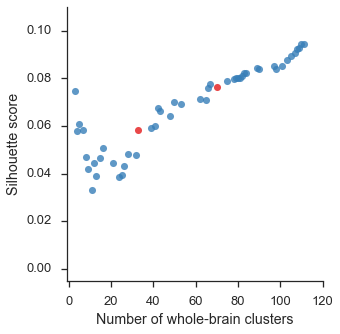

In [490]:
all_silhouettes['Local maxima'] = all_silhouettes.n_clusters.isin([33, 70])
p = sns.lmplot('n_clusters', 'silhouette_score', hue='Local maxima', data=all_silhouettes, fit_reg=False, 
              scatter_kws={"s": 50}, palette = reversed(sns.color_palette('Set1', 2)), legend=False)
p.set_xlabels('Number of whole-brain clusters')
p.set_ylabels('Silhouette score')
p.ax.set_ylim(-.005, 0.11)
p.ax.set_xlim(-1, 120)

In [427]:
all_silhouettes

,n_clusters,silhouette_score,Local maxima
0,3,0.074611,False
1,4,0.058024,False
2,5,0.060883,True
4,7,0.058422,False
5,8,0.047166,False
6,9,0.041882,False
8,11,0.032995,False
9,12,0.044293,False
10,13,0.038987,False
12,15,0.046469,False


In [10]:
from sklearn.metrics import silhouette_score
distances = joblib.load('../results/clustering/hierarchical/v6_distances_scaled.pkl')

In [435]:
## Mask 3, 6, and 16 - at least 50 voxels
vox = 500
for n_reg in [5, 16, 39, 70]:
    labels = fcluster(wb_Z, n_reg, 'maxclust')
    wb_cluster = nib.Nifti1Image(whole_brain_masker.unmask(labels), affine=LFC_mask.get_affine())    
    in_mask, masked_clustering = base.img_tools.mask_clusters(wb_cluster, LFC_mask, amount=vox, method='sum')
    n_in_mask = np.unique(masked_clustering.get_data()).shape[0] - 1
    nib.save(masked_clustering, '../results/clustering/hierarchical/fastward_v6_scaled_LFC/flat_k%d_o%d_%dv' % (n_in_mask, n_reg, vox))
    wb_cluster.get_data()[LFC_mask.get_data() == 0] = 0 
    nib.save(wb_cluster, '../results/clustering/hierarchical/fastward_v6_scaled_LFC/flat_k%d_o%d_masked' % (n_in_mask, n_reg))


### Calculate number of voxels in mask

In [494]:
n_in_mask = 0
perc = []
perc_in_mask = []
percentage = .5
for i, n_reg in enumerate(range(20, 100)):
    last_labels = masked_labels
    labels = fcluster(wb_Z, n_reg, 'maxclust')
    wb_cluster = nib.Nifti1Image(whole_brain_masker.unmask(labels), affine=LFC_mask.get_affine())
    
    in_mask, masked_clustering = base.img_tools.mask_clusters(wb_cluster, LFC_mask, amount=percentage)
    n_in_mask = np.unique(masked_clustering.get_data()).shape[0] - 1
    masked_dist = distances[[whole_brain_masker.mask(LFC_mask.get_data()) == 1]]
    masked_labels = labels[whole_brain_masker.mask(LFC_mask.get_data()) == 1]
    masked_data = masked_clustering.get_data().copy()
    masked_data[LFC_mask_1p.get_data() == 1] = 0
    masked_data[masked_data > 0] = 1
    
    if (i > 0) and (adjusted_rand_score(masked_labels, last_labels) < 1):
        perc.append([n_reg, n_in_mask,
                            LFC_masker.mask(masked_clustering).astype('bool').mean(),
                    whole_brain_masker.mask(masked_data).mean()])        
        nib.save(masked_clustering, '../results/clustering/hierarchical/fastward_v6_scaled_LFC/flat_k%d_o%d_%dp' % (n_in_mask, n_reg, percentage*100))

##### At 70 lpar seperates from DLPFC. Good solution w/ 17 clusters

Then choose a lower resolution clustering w/ ~5-7 networks

In [495]:
perc = pd.DataFrame(perc, columns=['n_clusters', 'n_lfc', 'perc_in_mask', 'perc_out_mask'])

####  % of voxels in mask in selected clusters

(-1, 35)

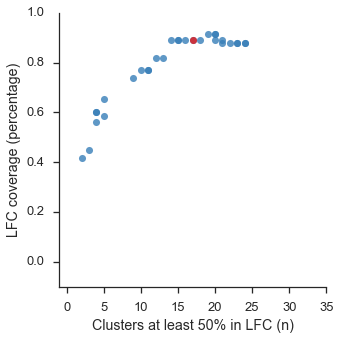

In [499]:
perc['Local maxima'] = perc.n_clusters.isin([70])
p = sns.lmplot('n_lfc', 'perc_in_mask', hue='Local maxima', data=perc, fit_reg=False, 
              scatter_kws={"s": 50}, palette = reversed(sns.color_palette('Set1', 2)), legend=False)
p.ax.set_xlabel('Clusters at least 50% in LFC (n)')
p.ax.set_ylabel('LFC coverage (percentage)')
p.ax.set_ylim(-.1, 1)
p.ax.set_xlim(-1, 35)

(-1, 35)

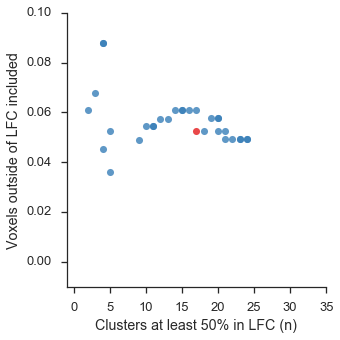

In [501]:
p = sns.lmplot('n_lfc', 'perc_out_mask', hue='Local maxima', data=perc, fit_reg=False, 
              scatter_kws={"s": 50}, palette = reversed(sns.color_palette('Set1', 2)), legend=False)
p.ax.set_xlabel('Clusters at least 50% in LFC (n)')
p.ax.set_ylabel('Voxels outside of LFC included')
p.ax.set_ylim(-.01, .1)
p.ax.set_xlim(-1, 35)

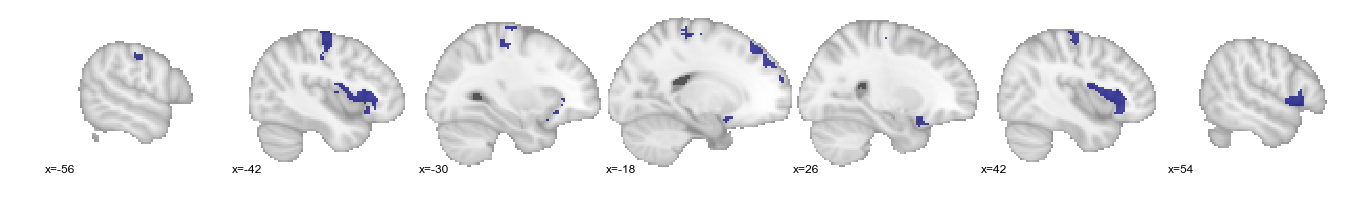

In [444]:
labels = fcluster(wb_Z, 70, 'maxclust')
wb_cluster = nib.Nifti1Image(whole_brain_masker.unmask(labels), affine=LFC_mask.get_affine())

in_mask, masked_clustering = base.img_tools.mask_clusters(wb_cluster, LFC_mask, amount=.5)

vox_excluded = nib.Nifti1Image(LFC_masker.unmask(LFC_masker.mask(masked_clustering).astype('bool') == False), 
                               LFC_mask.get_affine())
niplt.plot_roi(vox_excluded, display_mode='x')

In [445]:
nib.save(vox_excluded, '../results/clustering/hierarchical/fastward_v6_scaled_LFC/vox_excluded_LFC_k70.nii.gz')

In [446]:
voxels_clustered = masked_clustering.get_data().copy().astype('bool')
voxels_clustered[LFC_mask.get_data() == 1] = 0
voxels_clustered = voxels_clustered.astype('float32')

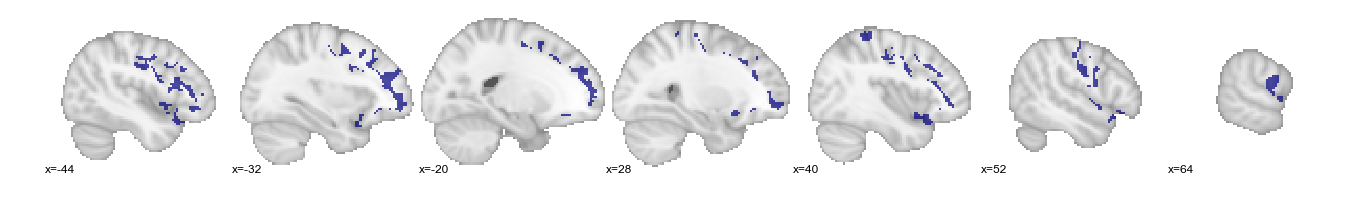

In [447]:
vox_not_LFC = nib.Nifti1Image(voxels_clustered, 
                               LFC_mask.get_affine())
niplt.plot_roi(vox_not_LFC, display_mode='x')

In [72]:
nib.save(vox_not_LFC, '../results/clustering/hierarchical/fastward_v6_scaled_LFC/vox_not_LFC_k26_40.nii.gz')

Goal - Identify 'networks' in LFC and two solutions at two levels of granularity

Network: range 6-16 networks, are by definition distributed, we elected to select only 20% coverage '
Coarse LFC solution: selected inital solution with jump in silhouette score. As many clusters continued to include non LFC voxels, we sought to include clusters with at least 33% of voxels in LFC. This threshold resulted in high LFC coverage with relatively few voxels outside primarily in parietalcortexd
Fine-grained solution: selected solution that had high coverage of LFC (90%) and very low coverage outside

### Visualize solutions

In [503]:
k_5 = nib.Nifti1Image(whole_brain_masker.unmask(fcluster(wb_Z, 5, 'maxclust')), affine=LFC_mask.get_affine())
_, l_5 = base.img_tools.mask_clusters(k_5, LFC_mask, amount=.2)
k_33 = nib.Nifti1Image(whole_brain_masker.unmask(fcluster(wb_Z, 33, 'maxclust')), affine=LFC_mask.get_affine())
_, l_33 = base.img_tools.mask_clusters(k_5, LFC_mask, amount=.33)
k_70 = nib.Nifti1Image(whole_brain_masker.unmask(fcluster(wb_Z, 70, 'maxclust')), affine=LFC_mask.get_affine())
_, l_70 = base.img_tools.mask_clusters(k_5, LFC_mask, amount=.5)